In [24]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [25]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [64]:
dump_site = pd.read_csv("https://data.wprdc.org/dataset/ed4cf849-d323-4d01-8a13-675d283f1ac9/resource/ee834d8d-ae71-4b3b-b02b-312ba321ff17/download/illegaldumpsites.csv")
dump = dump_site.loc[dump_site['City'] == 'Pittsburgh']
dump2 = dump.loc[dump['Neighborhood']!= 'Beltzhoover']
dump2.head(30)


,site_name,Status,City,Neighborhood,estimated_tons,location_description,latitude,longitude,Unnamed: 8
0,St. Martin Street,Surveyed,Pittsburgh,Allentown,0.5,NaN,40.42221971,-79.99022525,NaN
1,Brosville Street,Surveyed,Pittsburgh,Allentown,3,NaN,40.42370101,-79.98657393,NaN
2,McCain Street,Surveyed,Pittsburgh,Allentown,1,NaN,40.42427063,-79.99022675,NaN
3,Ceres Way,Surveyed,Pittsburgh,Allentown,0.5,NaN,40.42327242,-79.99248958,NaN
4,Eureka Street,Completed,Pittsburgh,Allentown,0.1,NaN,40.42372131,-79.99478912,NaN
5,222 Walter Street,Completed,Pittsburgh,Allentown,5,dump is in deteriorated garage,40.42022451,-79.99477699,NaN
6,Grimes and Elsinburg,Completed,Pittsburgh,Allentown,0.3,"residential street, across the street from a s...",40.41544068,-79.99297857,NaN
7,Parkwood Road Site 1,Surveyed,Pittsburgh,Arlington,3,NaN,40.41068203,-79.96578013,NaN
8,Parkwood Road Site 2,Surveyed,Pittsburgh,Arlington,4,NaN,40.41144932,-79.96714085,NaN
9,Parkwood Road Site 3,Completed,Pittsburgh,Arlington,2.5,NaN,40.41397095,-79.97727203,NaN


In [65]:
dumps = dump2.drop(['site_name', 'City', 'location_description','latitude', 'longitude', 'Status'], axis=1)
newdata = dumps.iloc[:,0:2]
newdata['estimated_tons'] = newdata['estimated_tons'].astype(float)
new = newdata.groupby('Neighborhood', as_index = False).sum()
new.head(79)



,Neighborhood,estimated_tons
0,Allentown,10.4
1,Arlington,17.5
2,Banksville,1.0
3,Bedford Dwellings,1.0
4,Beechview,11.0
5,Bloomfield,5.0
6,Bluff,1.0
7,Borough of Millvale,1.0
8,Brighton Heights,6.8
9,Brookline,35.7


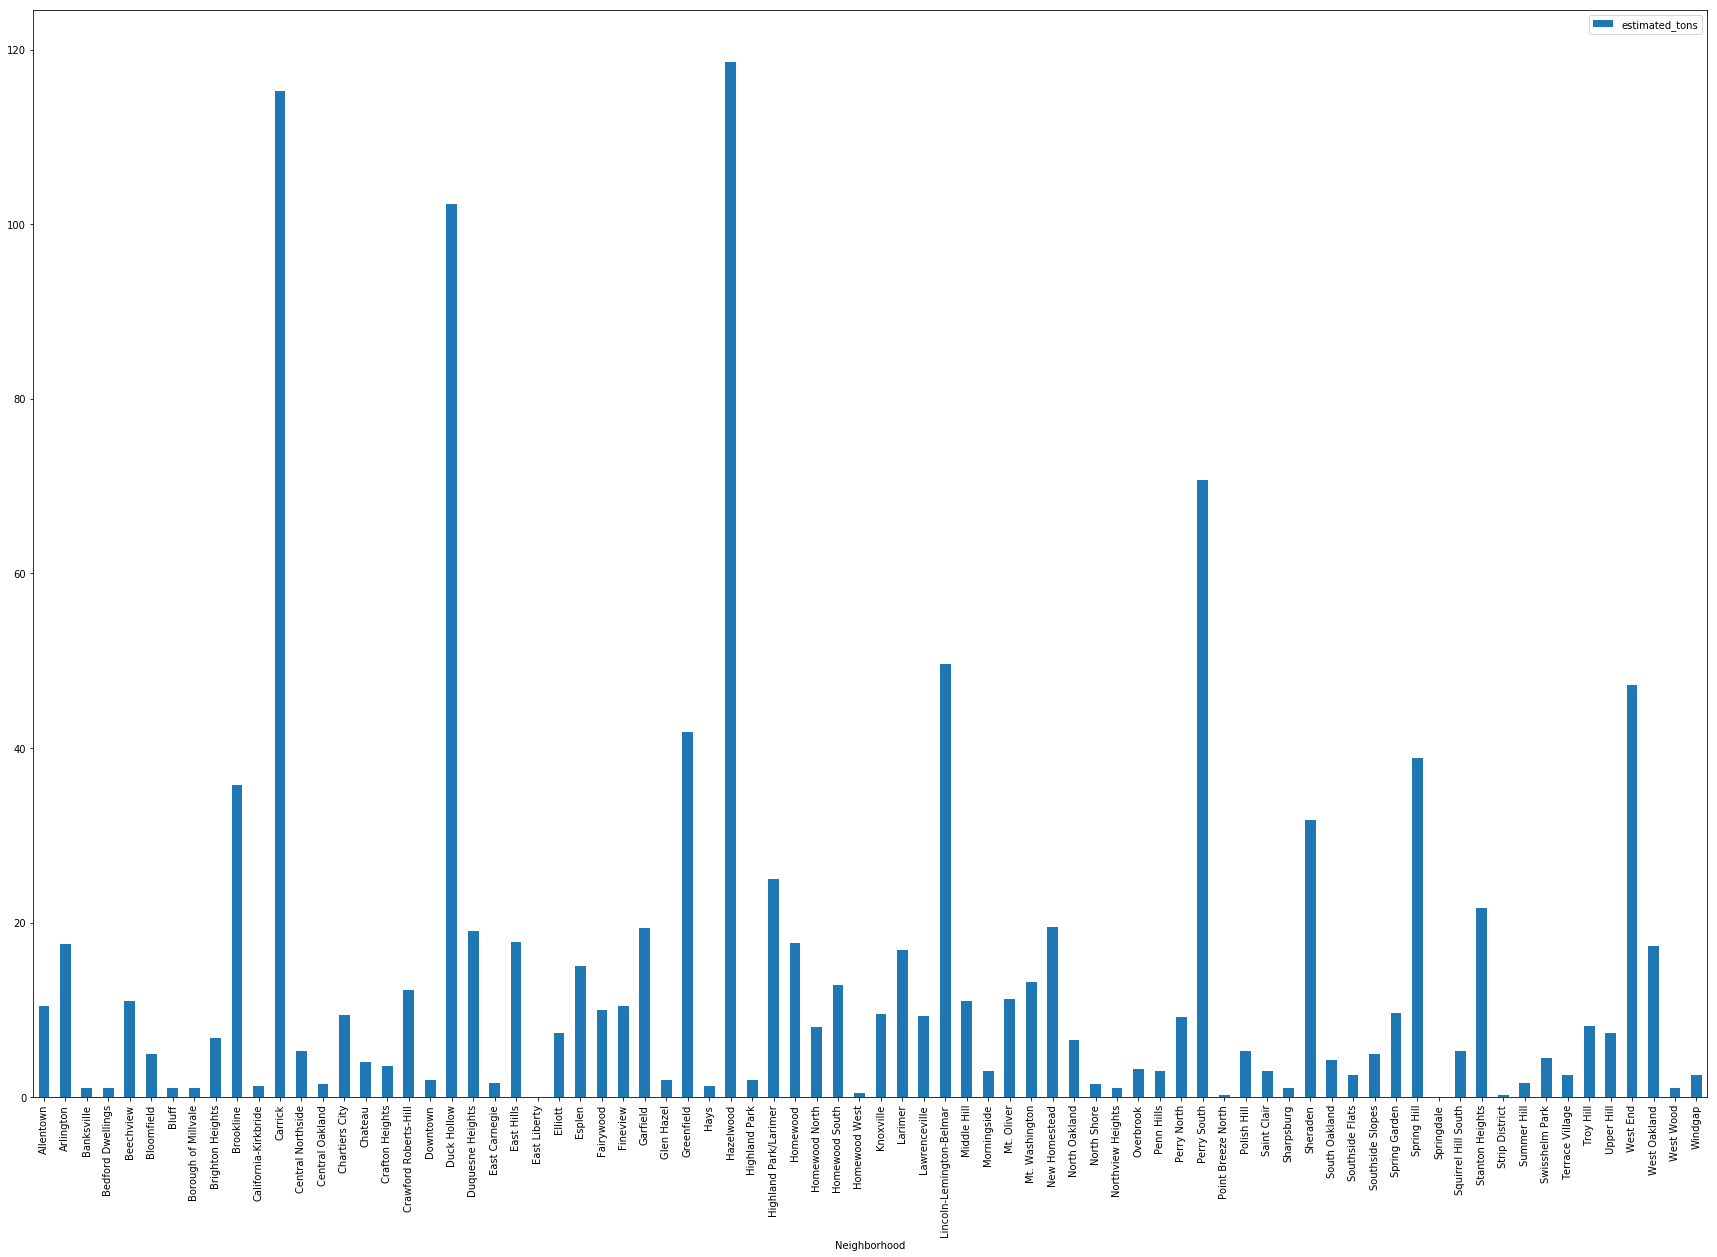

In [70]:
new.plot(x='Neighborhood', kind='bar', rot=90, figsize = (30,20))